In [1]:
from datetime import datetime
import numpy as np
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stockSymbol =["FB","AMZN","AAPL","NFLX","GOOG",'TSLA']

In [3]:
stockStartDate ='2013-01-01'

In [4]:
today=datetime.today().strftime('%Y-%m-%d')

In [5]:
today

'2022-01-25'

In [6]:
numAssets =len(stockSymbol)
print('you have '+str(numAssets)+' assets in your portfolio.' )

you have 6 assets in your portfolio.


In [7]:
def getMyPortfolio(stock=stockSymbol,start=stockStartDate,end=today,col='Adj Close'):
    data = web.DataReader(stock,data_source='yahoo',start=start,end=end)[col]
    return data

In [8]:
my_stocks = getMyPortfolio(stockSymbol)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA
Date,,,,,,
2012-12-31,26.620001,250.869995,16.439856,13.227143,352.369232,6.774000
2013-01-02,28.000000,257.309998,16.960686,13.144286,360.274597,7.072000
2013-01-03,27.770000,258.480011,16.746611,13.798571,360.483826,6.954000
2013-01-04,28.760000,259.149994,16.280138,13.711429,367.607117,6.880000
2013-01-07,29.420000,268.459991,16.184376,14.171429,366.003143,6.868000
...,...,...,...,...,...,...
2022-01-18,318.149994,3178.350098,169.800003,510.799988,2725.810059,1030.510010
2022-01-19,319.589996,3125.979980,166.229996,515.859985,2713.040039,995.650024
2022-01-20,316.559998,3033.350098,164.509995,508.250000,2670.129883,996.270020


In [9]:
#Create a function to visualize the portfolio
def showGraph(stocks=stockSymbol,start=stockStartDate,end=today,col='Adj Close'):
    title='Portfolio '+col+' Price History'
    my_stocks = getMyPortfolio(stock= stocks,start=start,end=end,col=col)
    plt.figure(figsize=(12.2,4.5))
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c],label=c)
    plt.title(title)
    plt.xlabel('Date',fontsize= 18)
    plt.ylabel(col+' Price USD($)',fontsize=18)
    plt.legend(my_stocks.columns.values,loc='upper left')
    plt.show()

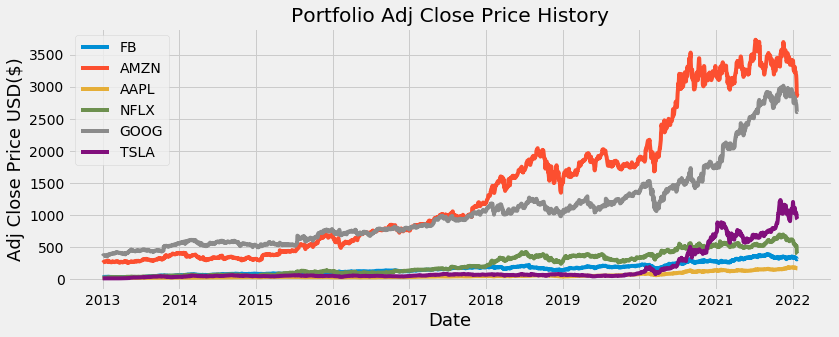

In [10]:
showGraph(stockSymbol)

In [11]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA
Date,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031681,-0.006264,0.022435,0.043992
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581,-0.016686
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760,-0.010641
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363,-0.001744
...,...,...,...,...,...,...
2022-01-18,-0.041428,-0.019863,-0.018894,-0.028325,-0.025010,-0.018197
2022-01-19,0.004526,-0.016477,-0.021025,0.009906,-0.004685,-0.033828
2022-01-20,-0.009481,-0.029632,-0.010347,-0.014752,-0.015816,0.000623


In [12]:
(27.770000/28.000000)-1

-0.00821428571428573

In [13]:
(28.760000/27.770000)-1

0.035649981994958724

In [14]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA
Symbols,,,,,,
FB,1.000000,0.523000,0.460335,0.363115,0.571497,0.302405
AMZN,0.523000,1.000000,0.467422,0.453756,0.604733,0.332133
AAPL,0.460335,0.467422,1.000000,0.276076,0.528867,0.327071
NFLX,0.363115,0.453756,0.276076,1.000000,0.414296,0.286350
GOOG,0.571497,0.604733,0.528867,0.414296,1.000000,0.325742
TSLA,0.302405,0.332133,0.327071,0.286350,0.325742,1.000000


In [16]:
daily_simple_returns.cov()#coefficient of varrance is measurement of the spread between numbers in the dataset , how far each number
#is from mean and the other number in the set... higher cov means  higer price and higher risk and return as well...lower cov means lower correlation between variance of two stock

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA
Symbols,,,,,,
FB,0.000458,0.000212,0.000175,0.000221,0.000197,0.000229
AMZN,0.000212,0.000359,0.000157,0.000244,0.000184,0.000223
AAPL,0.000175,0.000157,0.000316,0.000139,0.000151,0.000206
NFLX,0.000221,0.000244,0.000139,0.000808,0.000189,0.000288
GOOG,0.000197,0.000184,0.000151,0.000189,0.000258,0.000185
TSLA,0.000229,0.000223,0.000206,0.000288,0.000185,0.001251


In [19]:
daily_simple_returns.var()

Symbols
FB      0.000458
AMZN    0.000359
AAPL    0.000316
NFLX    0.000808
GOOG    0.000258
TSLA    0.001251
dtype: float64

In [20]:
print('The Stock Volatility:')#higer volatility higher risk and return and lower volatility lower return ,lower riskplt
daily_simple_returns.std()#NFLX is the most volatile stock and google is the least volatile stock 

The Stock Volatility:


Symbols
FB      0.021412
AMZN    0.018947
AAPL    0.017773
NFLX    0.028418
GOOG    0.016060
TSLA    0.035371
dtype: float64

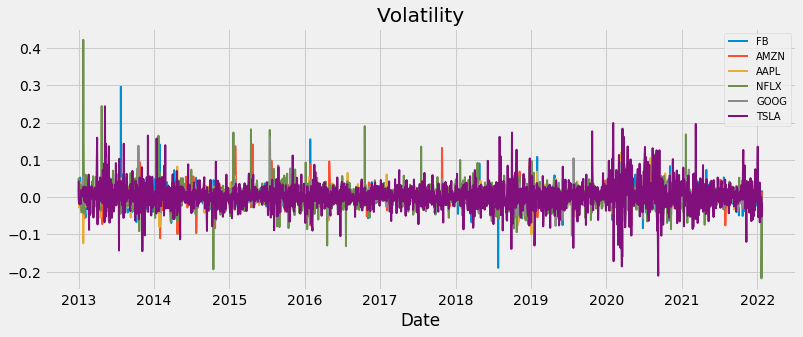

In [21]:
np.array(daily_simple_returns.index)
plt.figure(figsize=(12,4.5,))

for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c],lw=2,label=c)
plt.legend(loc='upper right', fontsize =10)
plt.title('Volatility')
plt.xlabel('Daily simple Returns')
plt.xlabel('Date')
plt.show()

In [22]:
dailyMeanSimplereturns= daily_simple_returns.mean()
print('The daily mean simple return: ')
print(dailyMeanSimplereturns)

The daily mean simple return: 
Symbols
FB      0.001301
AMZN    0.001250
AAPL    0.001160
NFLX    0.001873
GOOG    0.001005
TSLA    0.002779
dtype: float64


In [23]:
randomWeights = np.array([0.4,0.1,0.3,0.05,0.1,0.05])#40% FB, 10% AMZN,30% AAPL, 5% NFLX, 10% GOOG,5% TSLA
portfolioSimpleReturn = np.sum(dailyMeanSimplereturns*randomWeights)
print('The daily expected portfolio return: '+ str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013267131869575503


In [24]:
#Get the yearly simple returne
print('Expected annualised portfolio simple returne: ' + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple returne: 0.3356584363002602


In [25]:
#Calculate the growth of the investment
dailyCumulSimpleReturn=(daily_simple_returns+1).cumprod()
dailyCumulSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA
Date,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.051841,1.025671,1.031681,0.993736,1.022435,1.043992
2013-01-03,1.043201,1.030335,1.018659,1.043201,1.023029,1.026572
2013-01-04,1.080391,1.033005,0.990285,1.036613,1.043244,1.015648
2013-01-07,1.105184,1.070116,0.984460,1.071390,1.038692,1.013877
...,...,...,...,...,...,...
2022-01-18,11.951540,12.669311,10.328558,38.617559,7.735664,152.127249
2022-01-19,12.005634,12.460557,10.111402,39.000106,7.699424,146.981104
2022-01-20,11.891810,12.091323,10.006779,38.424775,7.577648,147.072630


In [26]:
-0.008214+1

0.991786

In [27]:
0.991786+0.03565

1.027436

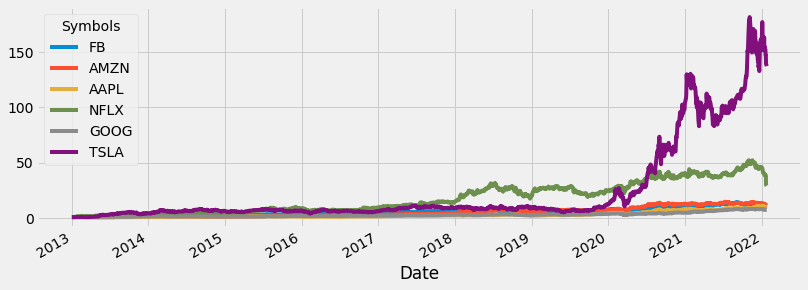

In [28]:
dailyCumulSimpleReturn.plot(figsize=(12.2,4.5))

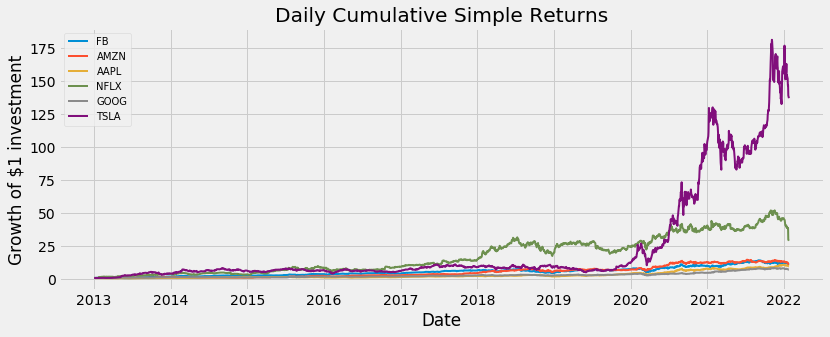

In [29]:
plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimpleReturn.columns.values:
    plt.plot(dailyCumulSimpleReturn[c],lw=2,label=c)
plt.legend(loc='upper left',fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()